In [29]:
import pandas as pd
import numpy as np
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
df = pd.read_csv('data/2만개 조합별 승패.csv')
df.drop(['Unnamed: 0','GameID'],1,inplace=True)
df

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


,Win,공격형 탱커,수비형 탱커,돌격형 전사,기동형 전사,기동형 암살자,전투형 암살자,집중형 마법사,광역형 마법사,견제형 마법사,강화형 서폿,포획형 서폿,원거리 딜러
0,True,0,0,2,0,0,0,1,0,0,1,0,1
1,False,0,0,0,0,0,3,0,1,0,0,0,1
2,False,0,0,1,0,1,0,0,2,0,0,0,1
3,True,0,0,0,0,1,1,1,1,0,0,0,1
4,False,0,1,0,0,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19869,True,0,0,0,2,0,0,1,0,0,1,0,1
19870,False,0,0,1,1,1,0,0,0,0,0,1,1
19871,True,0,0,1,0,1,1,1,0,0,0,0,1
19872,True,1,0,1,0,0,0,1,0,1,0,0,1


In [27]:
#formula = '결과 ~' + '+ '.join(df_sub.columns[:-1])
#formula
y, X = dmatrices('Win ~ Offensive_Tank + Defensive_Tank + Juggernaut_Warrior + Mobile_Warrior + Mobile_Assassin + Combat_Assassin + Focused_Mage + Mage + Keeper_Mage + Enchantment_Assistant + Capture_Assistant + Remote_dealer', data=df ,return_type='dataframe')
df_vif = pd.DataFrame()
df_vif['colname'] = X.columns
df_vif['VIF'] = [vif(X.values, i) for i in range(X.shape[1])]
df_vif

divide by zero encountered in double_scalars
divide by zero encountered in double_scalars


,colname,VIF
0,Intercept,0.0
1,Offensive_Tank,inf
2,Defensive_Tank,inf
3,Juggernaut_Warrior,inf
4,Mobile_Warrior,inf
5,Mobile_Assassin,inf
6,Combat_Assassin,inf
7,Focused_Mage,inf
8,Mage,inf
9,Keeper_Mage,inf


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(df.drop('Win',1),df['Win'], random_state=0)

C:\Users\ice_9\AppData\Local\Temp\ipykernel_16848\135159595.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train, X_test, y_train, y_test = train_test_split(df.drop('Win',1),df['Win'], random_state=0)


0.557 0.511
0.546 0.498
0.561 0.505
0.555 0.499
0.563 0.496
0.557 0.493
0.564 0.495
0.559 0.489
0.565 0.493
0.561 0.505


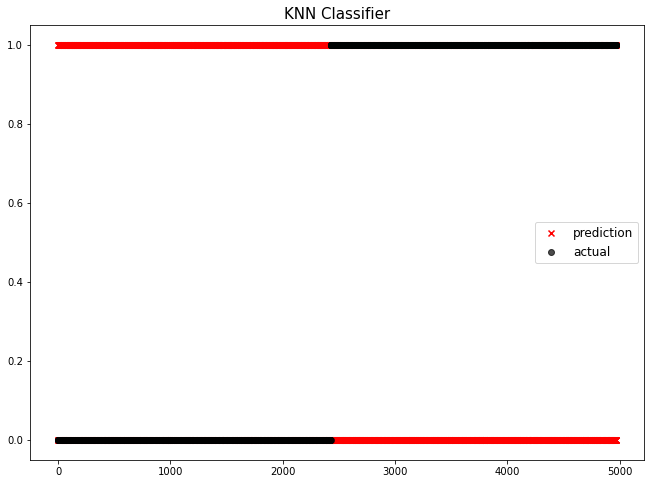

            model        f1
0  KNN Classifier  0.525178


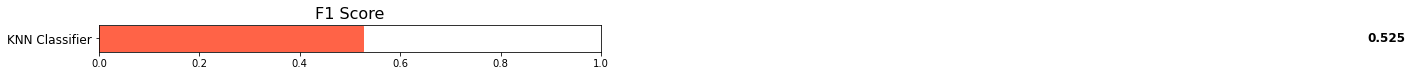

In [5]:
### 모델링 (random_state=0)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

my_predictions = {}
my_pred = None
my_actual = None
my_name = None

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(11, 8))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def f1_eval(name_, pred, actual):
    global my_predictions, colors, my_pred, my_actual, my_name
    
    my_name = name_
    my_pred = pred
    my_actual = actual

    plot_predictions(name_, pred, actual)

    f1 = f1_score(actual, pred)
    my_predictions[name_] = f1

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'f1'])
    print(df)
    min_ = 0
    max_ = 1
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['f1'], height=0.3)
    
    for i, v in enumerate(df['f1']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('F1 Score', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()
    
def add_model(name_, pred, actual):
    global my_predictions, my_pred, my_actual, my_name
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    f1 = f1_score(actual, pred)
    my_predictions[name_] = f1

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

def plot_all():
    global my_predictions, my_pred, my_actual, my_name
    
    plot_predictions(my_name, my_pred, my_actual)
    
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'f1'])
    print(df)
    min_ = 0
    max_ = 1
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['f1'], height=0.3)
    
    for i, v in enumerate(df['f1']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('F1 Score', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
#### knn 파라미터 찾기
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    print(knn.score(X_train, y_train).round(3), knn.score(X_test, y_test).round(3))
    # f1_eval(f'KNN Classifier {i}', pred, y_test)
#### 머신러닝 모델 돌려보기
#### hyperparameter 튜닝 전
# KNN classifier (K=3)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(knn.score(X_train, y_train).round(3), knn.score(X_test, y_test).round(3))
f1_eval('KNN Classifier', pred, y_test)

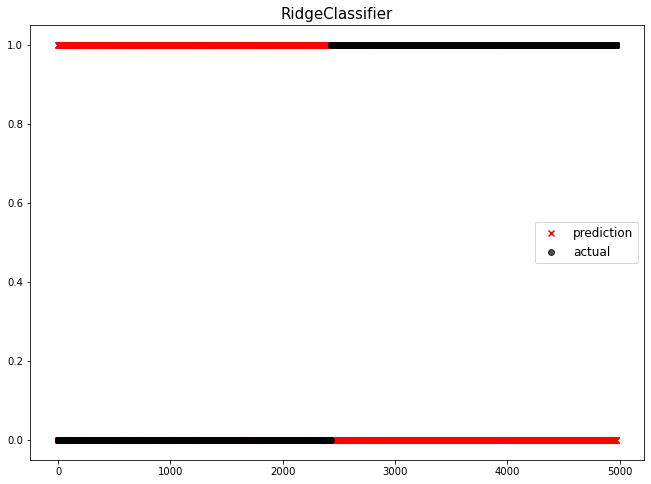

             model        f1
0   KNN Classifier  0.525178
1  RidgeClassifier  0.521055


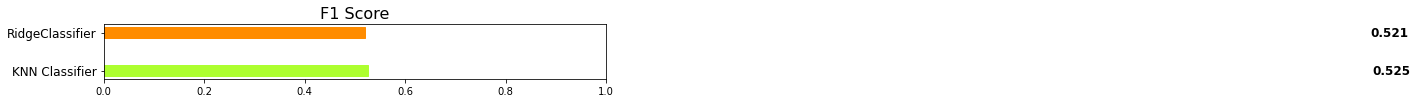

In [6]:
# RidgeCalssifier (alpha=1)
from sklearn.linear_model import RidgeClassifier

ridge = RidgeClassifier(alpha=1)
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)
f1_eval('RidgeClassifier', pred, y_test)

0.519 0.51


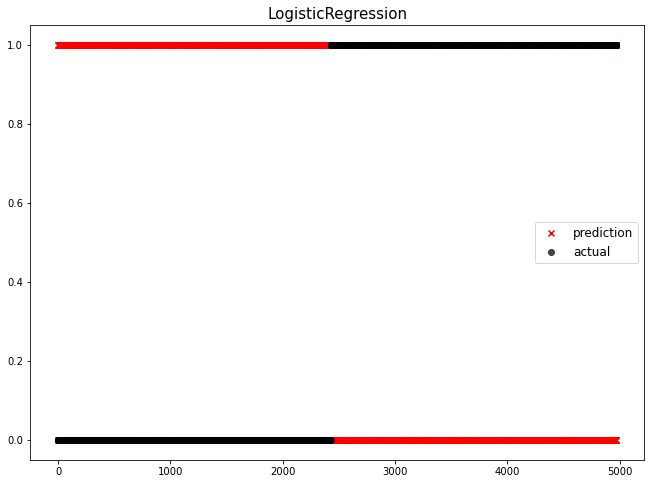

                model        f1
0      KNN Classifier  0.525178
1     RidgeClassifier  0.521055
2  LogisticRegression  0.521055


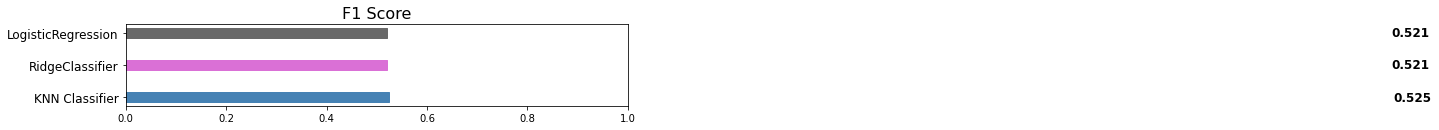

In [7]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(random_state=0)
lg.fit(X_train, y_train)
pred = lg.predict(X_test)
print(lg.score(X_train, y_train).round(3), lg.score(X_test, y_test).round(3))
f1_eval('LogisticRegression', pred, y_test)

0.521 0.51


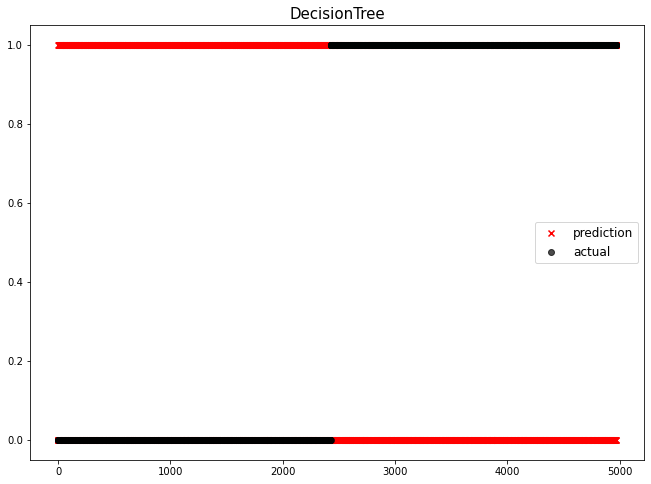

                model        f1
0        DecisionTree  0.542379
1      KNN Classifier  0.525178
2     RidgeClassifier  0.521055
3  LogisticRegression  0.521055


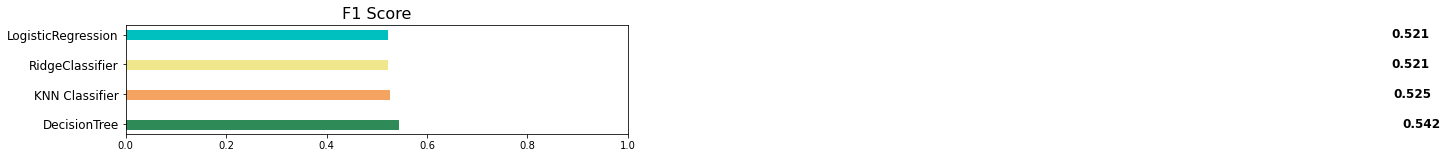

In [8]:
# DecisionTree (max_depth = 5, max_features=0.8)
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0,max_depth = 5, max_features=0.8)
tree.fit(X_train, y_train)
pred = tree.predict(X_test)
print(tree.score(X_train, y_train).round(3), tree.score(X_test, y_test).round(3))
f1_eval('DecisionTree', pred, y_test)

0.54 0.511


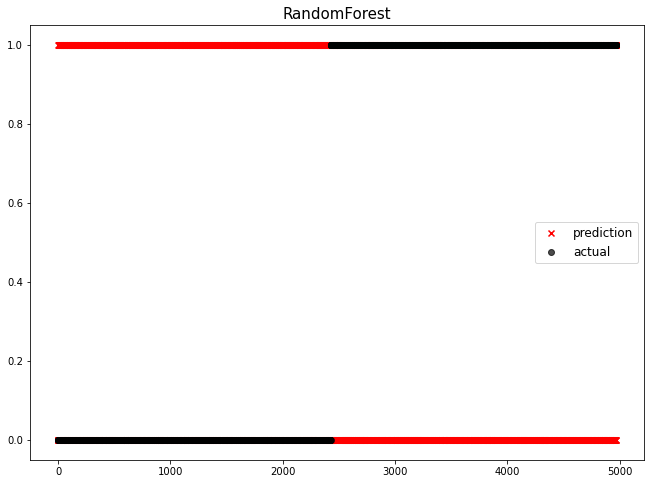

                model        f1
0        DecisionTree  0.542379
1        RandomForest  0.540745
2      KNN Classifier  0.525178
3     RidgeClassifier  0.521055
4  LogisticRegression  0.521055


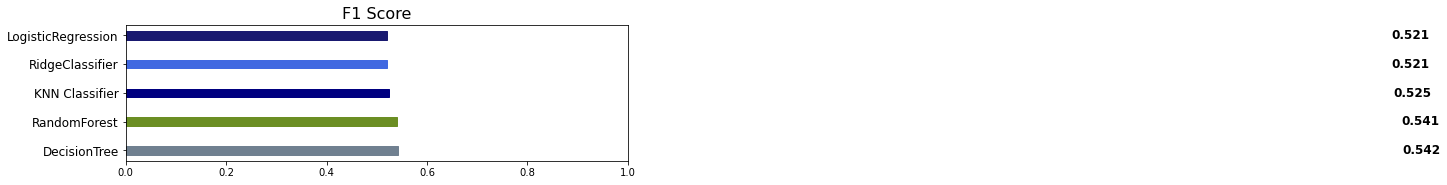

In [9]:
#RF (max_depth = 5)
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state = 0, max_depth = 5)
forest.fit(X_train, y_train)
pred = forest.predict(X_test)
print(forest.score(X_train, y_train).round(3), forest.score(X_test, y_test).round(3))
f1_eval('RandomForest', pred, y_test)

0.585 0.493


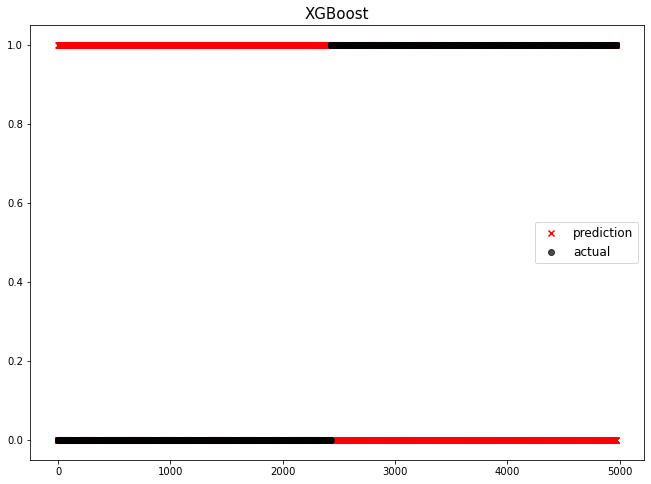

                model        f1
0        DecisionTree  0.542379
1        RandomForest  0.540745
2      KNN Classifier  0.525178
3     RidgeClassifier  0.521055
4  LogisticRegression  0.521055
5             XGBoost  0.500495


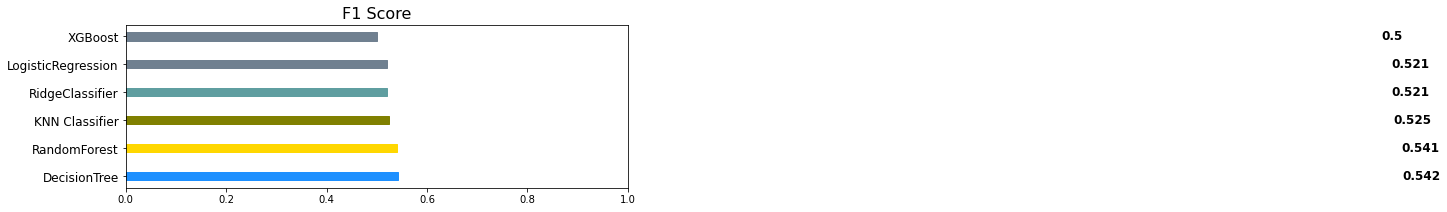

In [10]:
# XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 0)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
print(xgb.score(X_train, y_train).round(3), xgb.score(X_test, y_test).round(3))
f1_eval('XGBoost', pred, y_test)

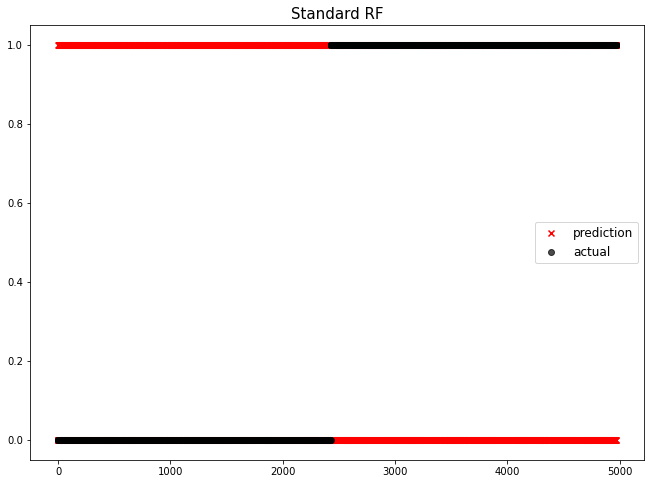

                model        f1
0        DecisionTree  0.542379
1        RandomForest  0.540745
2         Standard RF  0.540745
3      KNN Classifier  0.525178
4     RidgeClassifier  0.521055
5  LogisticRegression  0.521055
6             XGBoost  0.500495


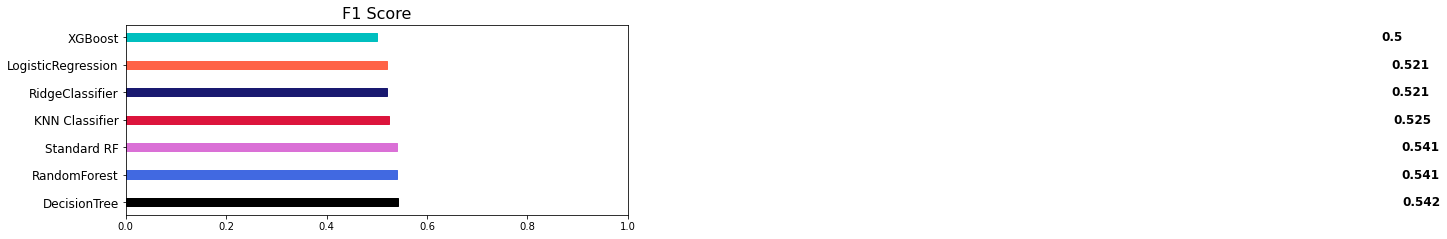

In [11]:
RF_pipeline = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(random_state = 0, max_depth = 5)
)
RF_pipeline.fit(X_train, y_train)
pred = RF_pipeline.predict(X_test)
f1_eval('Standard RF', pred, y_test)

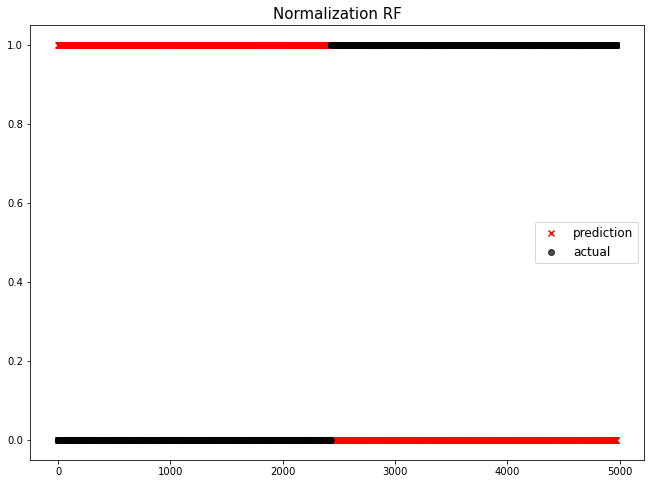

                model        f1
0        DecisionTree  0.542379
1        RandomForest  0.540745
2         Standard RF  0.540745
3    Normalization RF  0.540745
4      KNN Classifier  0.525178
5     RidgeClassifier  0.521055
6  LogisticRegression  0.521055
7             XGBoost  0.500495


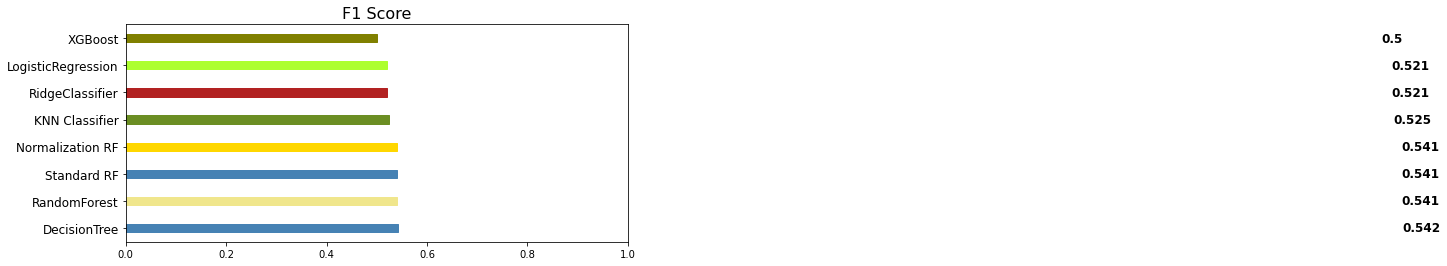

In [12]:
RF_pipeline = make_pipeline(
    MinMaxScaler(),
    RandomForestClassifier(random_state = 0, max_depth = 5)
)
RF_pipeline.fit(X_train, y_train)
pred = RF_pipeline.predict(X_test)
f1_eval('Normalization RF', pred, y_test)

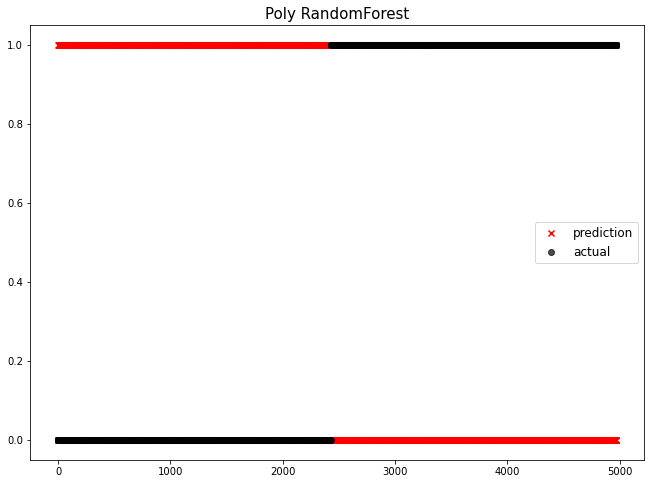

                model        f1
0        DecisionTree  0.542379
1        RandomForest  0.540745
2         Standard RF  0.540745
3    Normalization RF  0.540745
4   Poly RandomForest  0.526639
5      KNN Classifier  0.525178
6     RidgeClassifier  0.521055
7  LogisticRegression  0.521055
8             XGBoost  0.500495


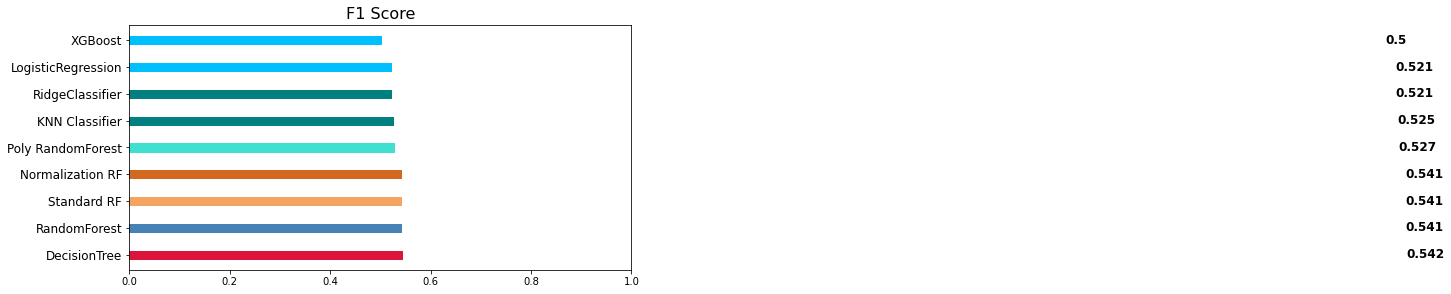

In [13]:
poly_RF_pipeline = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2, include_bias=False),
    RandomForestClassifier(random_state = 0, max_depth = 5)
)
poly_RF_pipeline.fit(X_train, y_train)
poly_pred = poly_RF_pipeline.predict(X_test)
f1_eval('Poly RandomForest', poly_pred, y_test)

In [14]:
from sklearn.ensemble import VotingClassifier

models = [
    ('Logi', LogisticRegression()), 
    # ('ridge', RidgeClassifier()),
    # ('knn', KNeighborsClassifier()),
    # ('tree', DecisionTreeClassifier()),
    ('ranfore', RandomForestClassifier()),
    ('xgb', XGBClassifier())
]

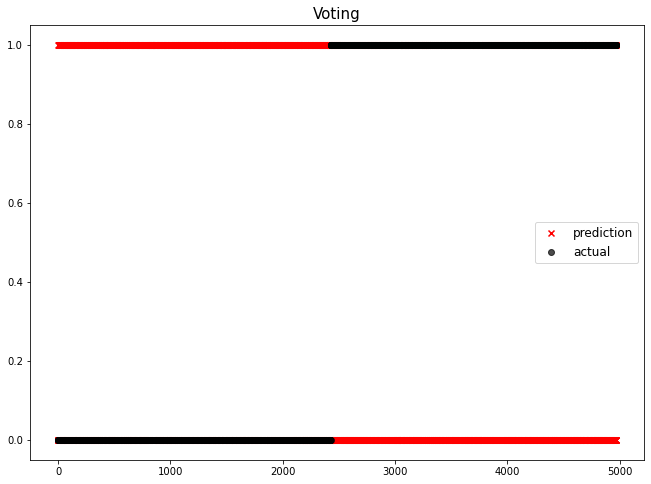

                model        f1
0        DecisionTree  0.542379
1        RandomForest  0.540745
2         Standard RF  0.540745
3    Normalization RF  0.540745
4   Poly RandomForest  0.526639
5      KNN Classifier  0.525178
6     RidgeClassifier  0.521055
7  LogisticRegression  0.521055
8              Voting  0.505347
9             XGBoost  0.500495


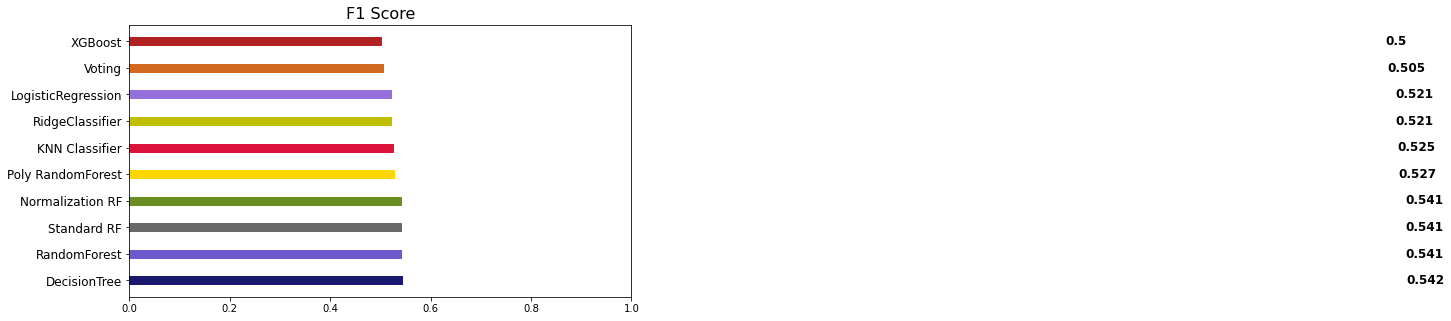

In [15]:
vc = VotingClassifier(models, voting='soft', n_jobs=-1)
vc.fit(X_train, y_train)
pred = vc.predict(X_test)
f1_eval('Voting', pred, y_test)

In [16]:
models = [
    ('Logi', LogisticRegression()), 
    # ('ridge', RidgeClassifier()),
    # ('knn', KNeighborsClassifier()),
    # ('tree', DecisionTreeClassifier()),
    ('ranfore', RF_pipeline),
    ('xgb', XGBClassifier())
]

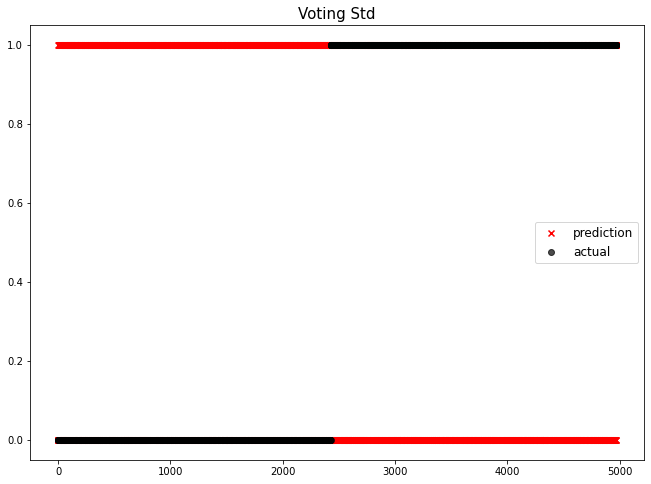

                 model        f1
0         DecisionTree  0.542379
1         RandomForest  0.540745
2          Standard RF  0.540745
3     Normalization RF  0.540745
4           Voting Std  0.527979
5    Poly RandomForest  0.526639
6       KNN Classifier  0.525178
7      RidgeClassifier  0.521055
8   LogisticRegression  0.521055
9               Voting  0.505347
10             XGBoost  0.500495


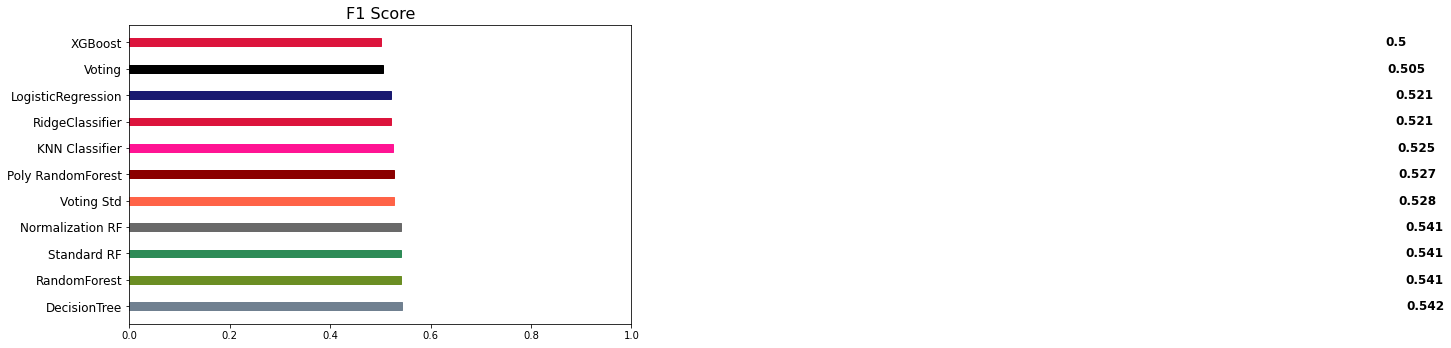

In [17]:
vc = VotingClassifier(models, voting='soft', n_jobs=-1)
vc.fit(X_train, y_train)
pred = vc.predict(X_test)
f1_eval('Voting Std', pred, y_test)

In [18]:
from sklearn.ensemble import StackingClassifier

stack_models = [
    ('randomforest', forest), 
    ('logistic', lg),
]

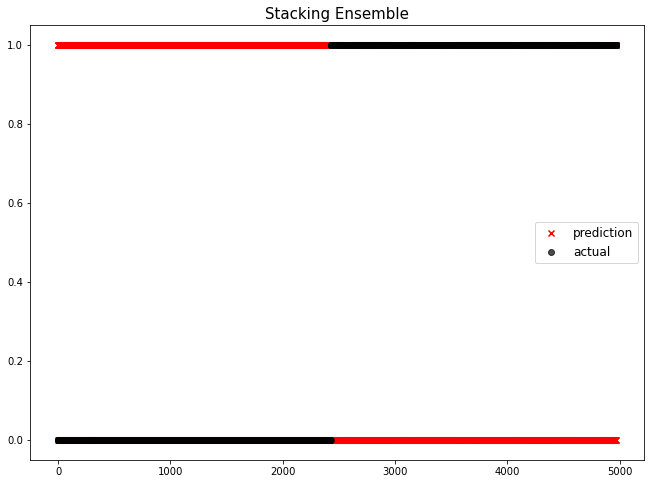

                 model        f1
0         DecisionTree  0.542379
1         RandomForest  0.540745
2          Standard RF  0.540745
3     Normalization RF  0.540745
4           Voting Std  0.527979
5    Poly RandomForest  0.526639
6       KNN Classifier  0.525178
7      RidgeClassifier  0.521055
8   LogisticRegression  0.521055
9    Stacking Ensemble  0.507570
10              Voting  0.505347
11             XGBoost  0.500495


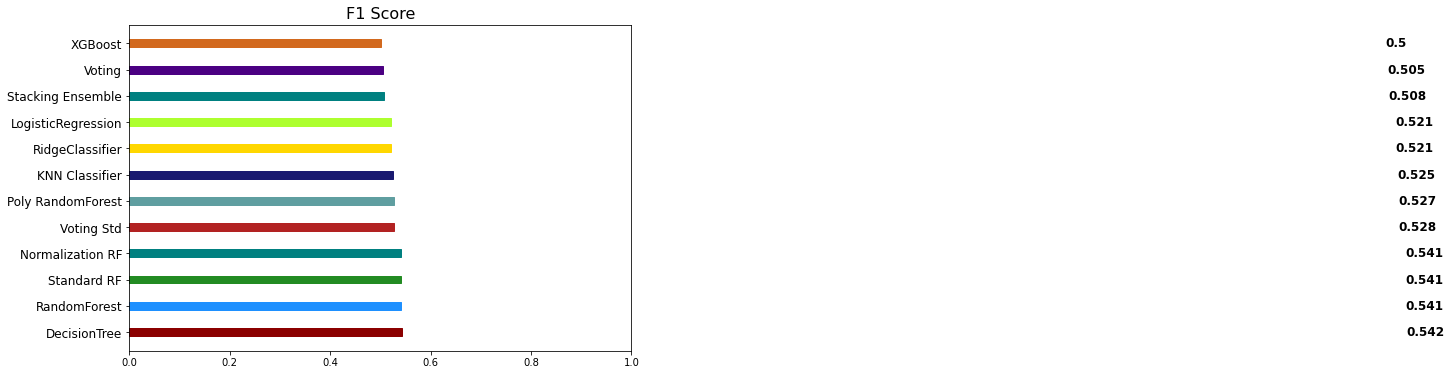

In [19]:
stack_cls = StackingClassifier(stack_models, final_estimator=xgb, n_jobs=-1)

# 샘플 데이터, 알고리즘 3개만 사용했지만 시간이 많이 걸림을 확인 가능
stack_cls.fit(X_train, y_train)
stack_pred = stack_cls.predict(X_test)
f1_eval('Stacking Ensemble', stack_pred, y_test)

#### hyperparameter 튜닝 후

In [54]:
params = {
    'n_estimators': [100, 200, 300], 
    'random_state': [0], 
    'max_depth': [7, 8, 9, 10], 
    'max_features': [0.7, 0.8, 0.9], 
    'min_samples_split': [5, 10, 20],
}

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

##### Grid Search RF

In [56]:
#cv 6 grid search
grid_search = GridSearchCV(RandomForestClassifier(), params, cv=6, n_jobs=-1, scoring='f1')
grid_search.fit(X_train,y_train)
y_pred = grid_search.predict(X_test)
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.score(X_test,y_test)) #해당것 score
print(roc_auc_score(y_test,y_pred)) #roc score

{'max_depth': 10, 'max_features': 0.8, 'min_samples_split': 10, 'n_estimators': 300, 'random_state': 0}
0.8527666581712284
0.8459530026109661
0.8458241466041272


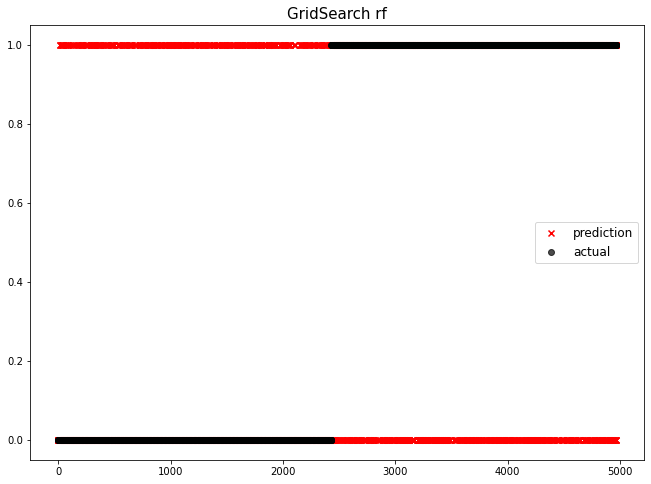

                 model        f1
0               Voting  0.859873
1           Voting Std  0.857371
2              XGBoost  0.849600
3      RidgeClassifier  0.847073
4         RandomForest  0.846229
5          Standard RF  0.846229
6     Normalization RF  0.846229
7        GridSearch rf  0.845953
8    Stacking Ensemble  0.842354
9         DecisionTree  0.840784
10   Poly RandomForest  0.839937
11  LogisticRegression  0.826988
12      KNN Classifier  0.658735


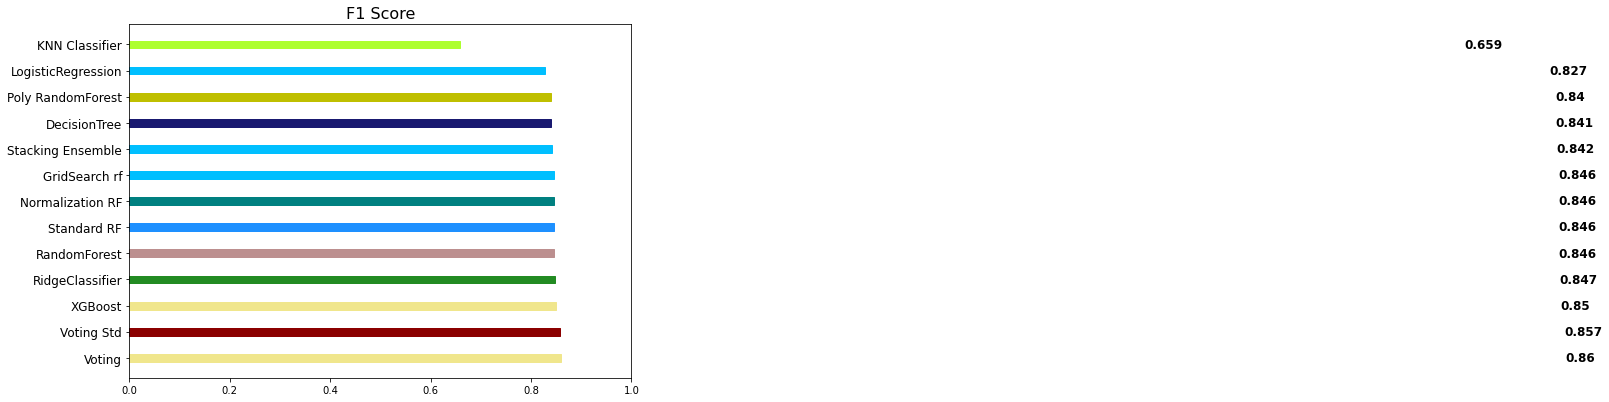

In [77]:
rf_best = RandomForestClassifier(**grid_search.best_params_)
rf_best.fit(X_train, y_train)
rf_best_pred = rf_best.predict(X_test)
f1_eval('GridSearch rf', rf_best_pred, y_test)

In [78]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=6)        # 6개로 나눈다
n_splits = 6

##### XGBclassifier grid search

In [79]:
params = {
    'n_estimators': [100, 200, 300], 
    'random_state': [0], 
    'learning_rate': [0.01, 0.1], 
    'max_depth': [5, 6, 7], 
    'subsample': [0.6, 0.7, 0.8, 0.9],
}
#cv 6 grid search
grid_search = GridSearchCV(XGBClassifier(), params, cv=6, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train,y_train)
y_pred = grid_search.predict(X_test)
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.score(X_test,y_test)) #해당것 score
print(roc_auc_score(y_test,y_pred)) #roc score


{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'random_state': 0, 'subsample': 0.9}
0.8586681672818085
0.854380664652568
0.8545729538579717


##### lgbm grid search

In [80]:
from lightgbm import LGBMClassifier

{'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1500, 'random_state': 0, 'subsample': 0.6}
0.8612191156647366
0.8549848942598187
0.8551147422613137


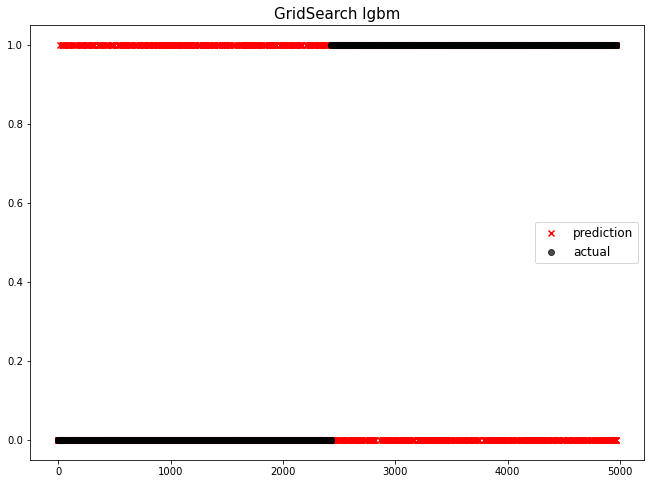

                 model        f1
0               Voting  0.859873
1           Voting Std  0.857371
2      GridSearch lgbm  0.856572
3              XGBoost  0.849600
4      RidgeClassifier  0.847073
5         RandomForest  0.846229
6          Standard RF  0.846229
7     Normalization RF  0.846229
8        GridSearch rf  0.845953
9    Stacking Ensemble  0.842354
10        DecisionTree  0.840784
11   Poly RandomForest  0.839937
12  LogisticRegression  0.826988
13      KNN Classifier  0.658735


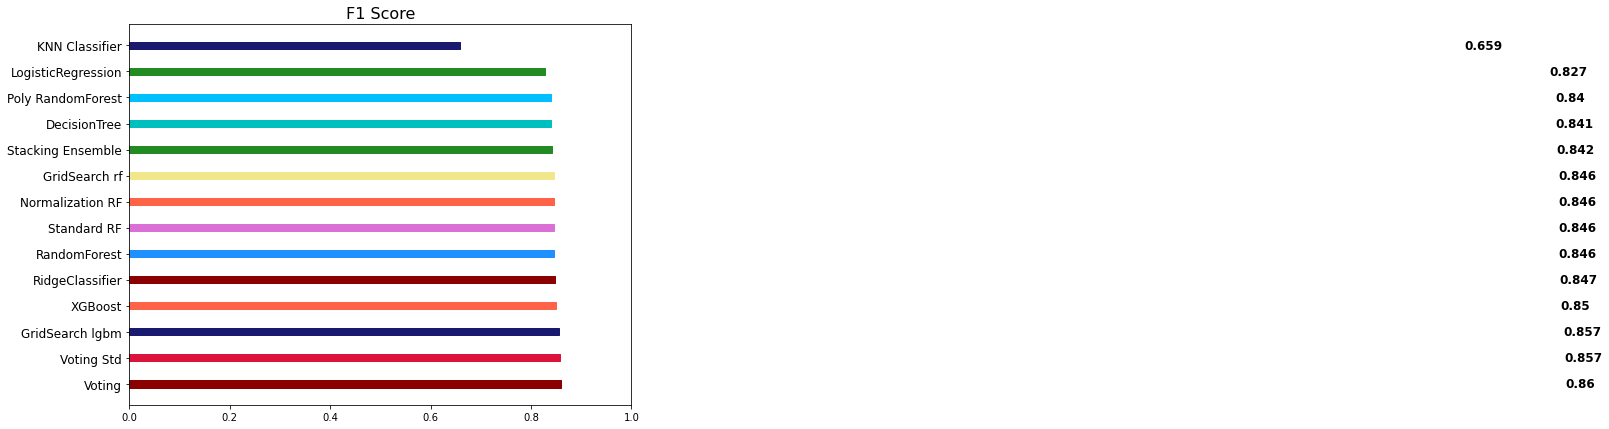

In [81]:
params = {
    'n_estimators': [1500, 2000], 
    'random_state': [0], 
    'learning_rate': [0.01], 
    'max_depth': [5, 6, 7], 
    'subsample': [0.6, 0.7],
    'colsample_bytree' : [0.8, 0.9]
}
#cv 6 grid search
grid_search = GridSearchCV(XGBClassifier(), params, cv=6, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train,y_train)
y_pred = grid_search.predict(X_test)
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.score(X_test,y_test)) #해당것 score
print(roc_auc_score(y_test,y_pred)) #roc score

lgbm_best = LGBMClassifier(**grid_search.best_params_)
lgbm_best.fit(X_train, y_train)
lgbm_best_pred = lgbm_best.predict(X_test)
f1_eval('GridSearch lgbm', lgbm_best_pred, y_test)

In [26]:
from sklearn.ensemble import VotingClassifier

In [83]:
rf_best = make_pipeline(
    # StandardScaler(),
    RandomForestClassifier(max_depth=10, max_features= 0.8, min_samples_split= 10,
 n_estimators= 300, random_state= 0),
)

In [84]:
xgb_best = make_pipeline(
    XGBClassifier(learning_rate= 0.1, max_depth= 5, n_estimators= 100,
 random_state= 0, subsample= 0.9),
)


In [85]:
lgbm_best = make_pipeline(
    StandardScaler(),
    LGBMClassifier(colsample_bytree= 0.8, learning_rate= 0.01,
 max_depth= 5, n_estimators= 1500, random_state= 0,
 subsample= 0.6),
)

In [86]:
knn_best = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=3),
)

In [87]:
lg_best = make_pipeline(
    # StandardScaler(),
    LogisticRegression(),
)

In [88]:
Ridge_best = make_pipeline(
    # StandardScaler(),
    RidgeClassifier(alpha=3),
)

In [89]:
from sklearn.ensemble import GradientBoostingClassifier

In [90]:
gd_best = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(learning_rate= 0.1, max_depth= 6, max_features= 0.9,
 n_estimators= 200, random_state= 0, subsample= 0.7),
)

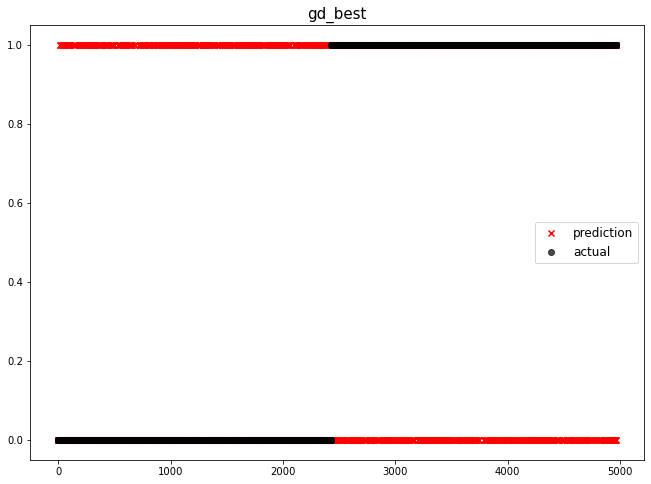

                 model        f1
0               Voting  0.859873
1           Voting Std  0.857371
2      GridSearch lgbm  0.856572
3              gd_best  0.854423
4              XGBoost  0.849600
5      RidgeClassifier  0.847073
6         RandomForest  0.846229
7          Standard RF  0.846229
8     Normalization RF  0.846229
9        GridSearch rf  0.845953
10   Stacking Ensemble  0.842354
11        DecisionTree  0.840784
12   Poly RandomForest  0.839937
13  LogisticRegression  0.826988
14      KNN Classifier  0.658735


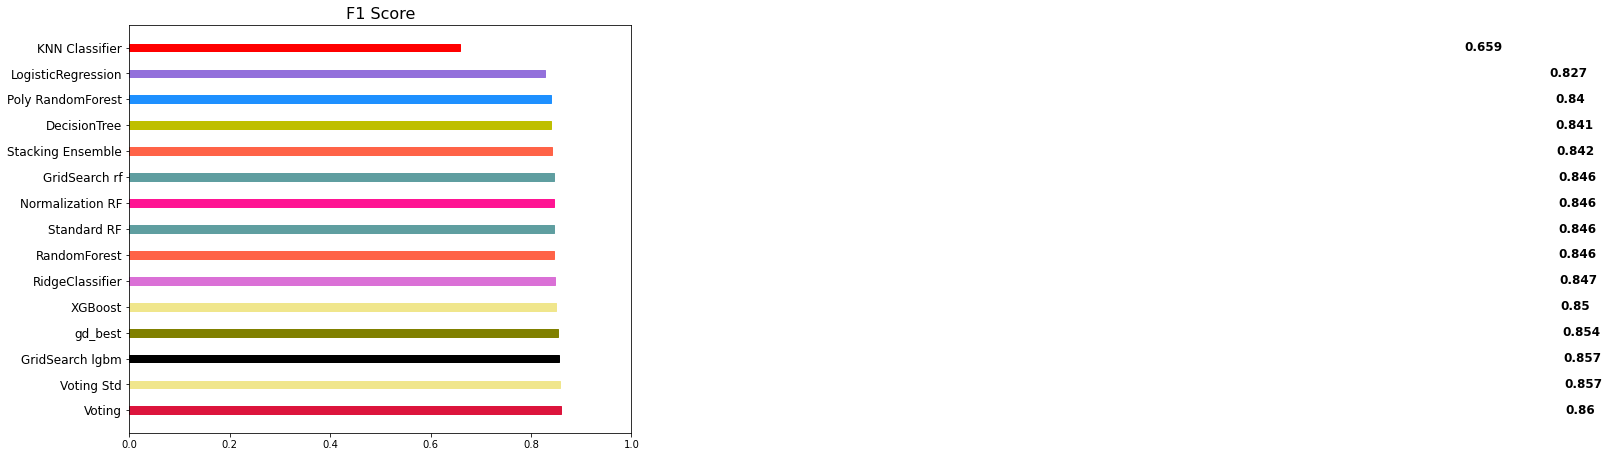

In [91]:
gd_best.fit(X_train, y_train)
gd_best_pred = gd_best.predict(X_test)
f1_eval('gd_best', gd_best_pred, y_test)

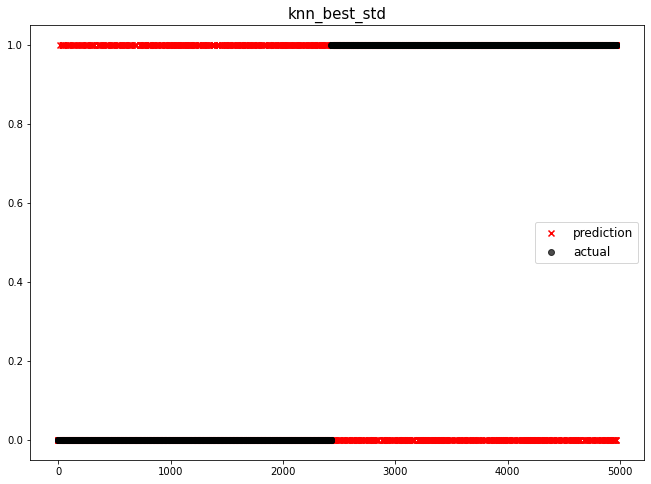

                 model        f1
0               Voting  0.859873
1           Voting Std  0.857371
2         knn_best_std  0.857371
3      GridSearch lgbm  0.856572
4              gd_best  0.854423
5              XGBoost  0.849600
6      RidgeClassifier  0.847073
7         RandomForest  0.846229
8          Standard RF  0.846229
9     Normalization RF  0.846229
10       GridSearch rf  0.845953
11   Stacking Ensemble  0.842354
12        DecisionTree  0.840784
13   Poly RandomForest  0.839937
14  LogisticRegression  0.826988
15      KNN Classifier  0.658735


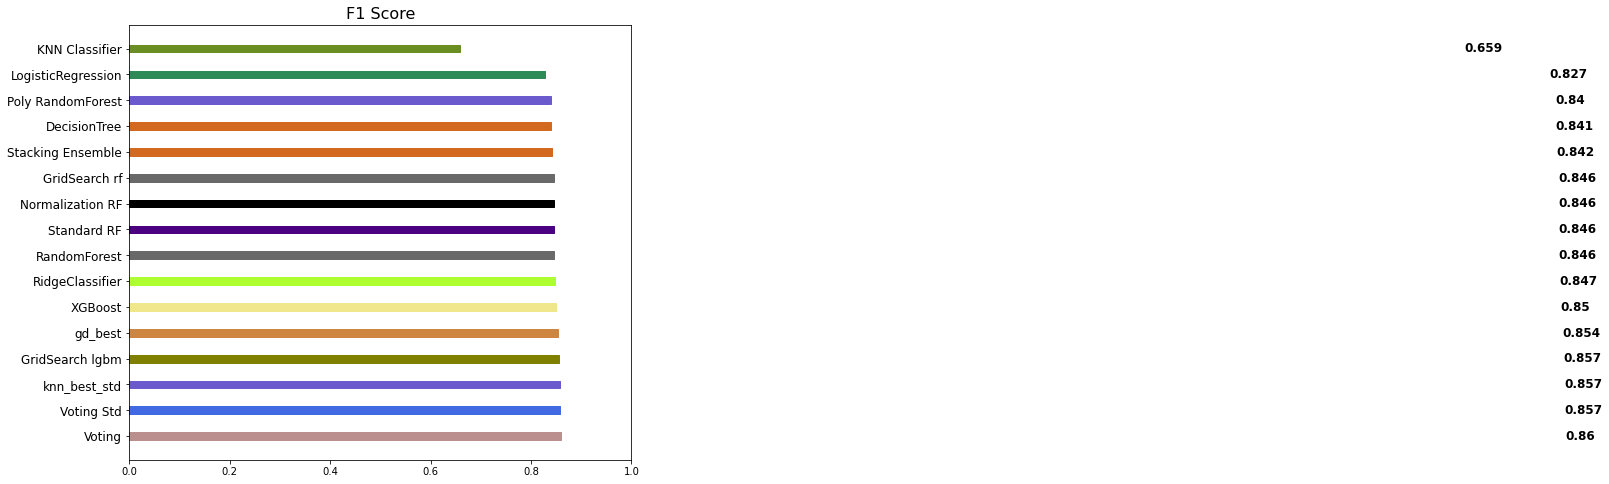

In [92]:
knn_best.fit(X_train, y_train)
knn_best_pred = knn_best.predict(X_test)
f1_eval('knn_best_std', pred, y_test)

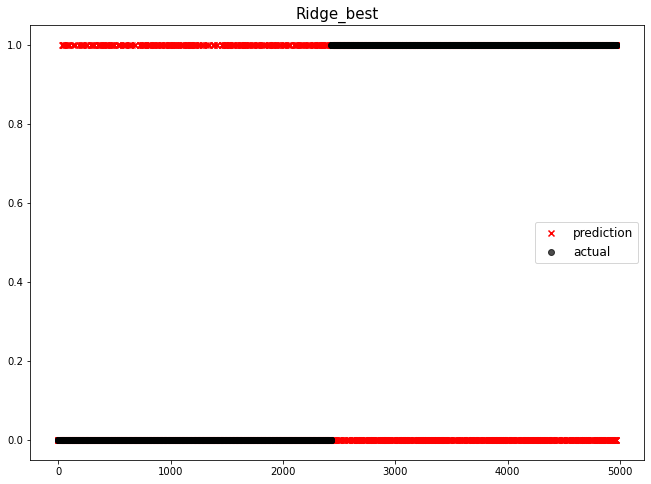

                 model        f1
0               Voting  0.859873
1           Voting Std  0.857371
2         knn_best_std  0.857371
3      GridSearch lgbm  0.856572
4              gd_best  0.854423
5              XGBoost  0.849600
6      RidgeClassifier  0.847073
7           Ridge_best  0.846360
8         RandomForest  0.846229
9          Standard RF  0.846229
10    Normalization RF  0.846229
11       GridSearch rf  0.845953
12   Stacking Ensemble  0.842354
13        DecisionTree  0.840784
14   Poly RandomForest  0.839937
15  LogisticRegression  0.826988
16      KNN Classifier  0.658735


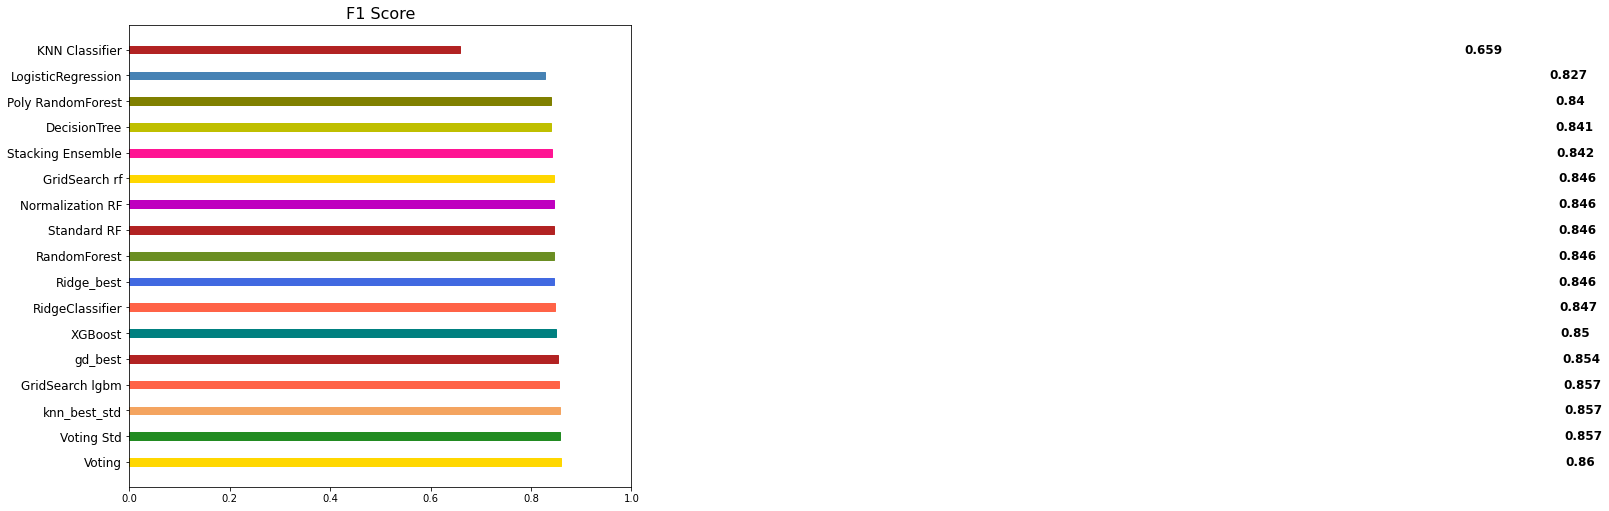

In [93]:
Ridge_best.fit(X_train, y_train)
Ridge_best_pred = Ridge_best.predict(X_test)
f1_eval('Ridge_best', Ridge_best_pred, y_test)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


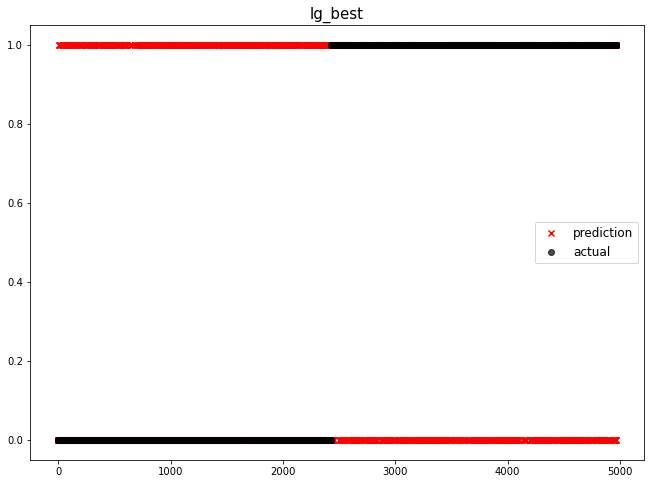

                 model        f1
0               Voting  0.859873
1           Voting Std  0.857371
2         knn_best_std  0.857371
3      GridSearch lgbm  0.856572
4              gd_best  0.854423
5              XGBoost  0.849600
6      RidgeClassifier  0.847073
7           Ridge_best  0.846360
8         RandomForest  0.846229
9          Standard RF  0.846229
10    Normalization RF  0.846229
11       GridSearch rf  0.845953
12   Stacking Ensemble  0.842354
13        DecisionTree  0.840784
14   Poly RandomForest  0.839937
15  LogisticRegression  0.826988
16             lg_best  0.826988
17      KNN Classifier  0.658735


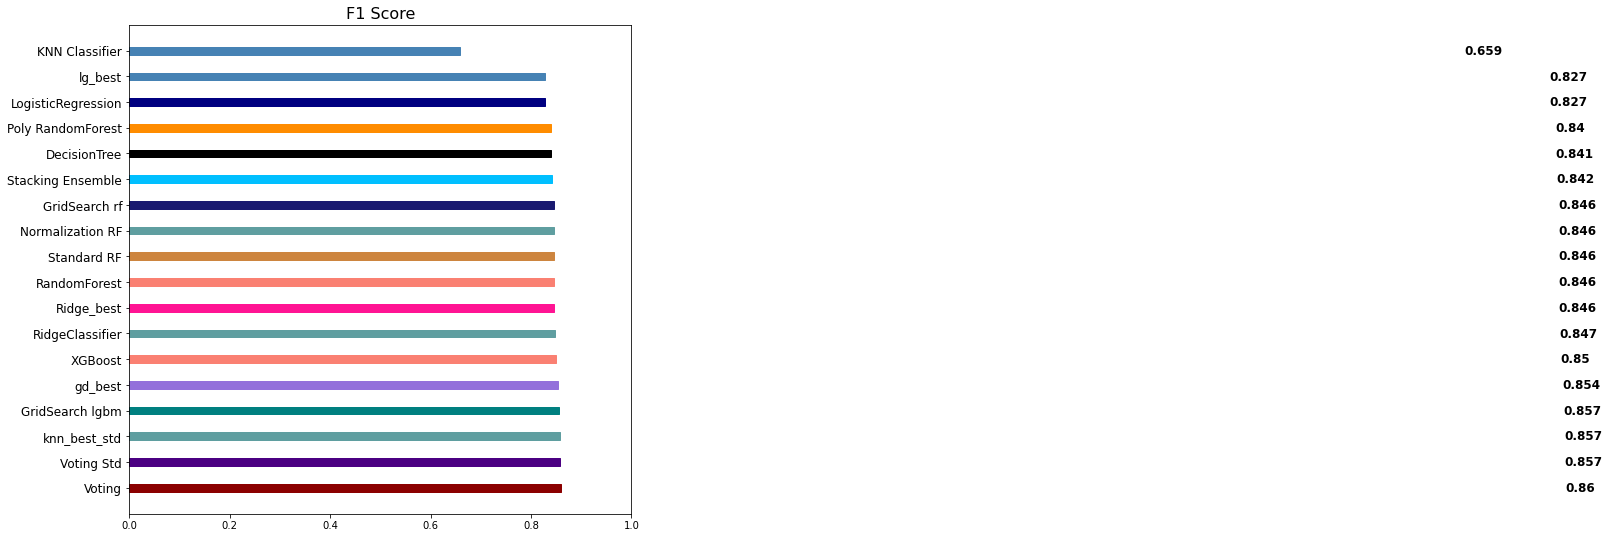

In [94]:
lg_best.fit(X_train, y_train)
lg_best_pred = lg_best.predict(X_test)
f1_eval('lg_best', lg_best_pred, y_test)

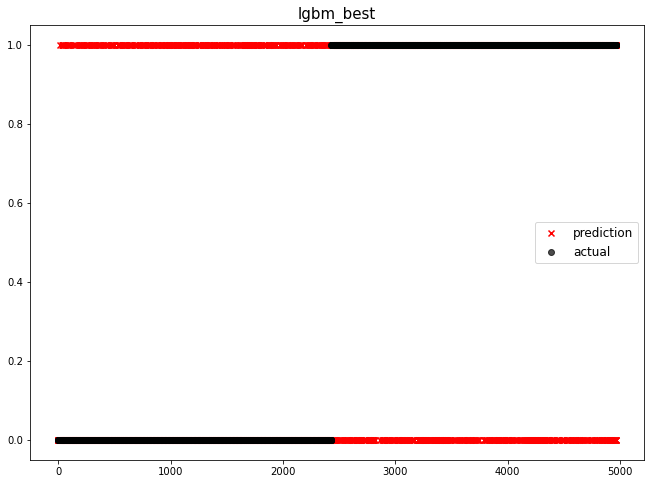

                 model        f1
0               Voting  0.859873
1           Voting Std  0.857371
2         knn_best_std  0.857371
3      GridSearch lgbm  0.856572
4              gd_best  0.854423
5            lgbm_best  0.853951
6              XGBoost  0.849600
7      RidgeClassifier  0.847073
8           Ridge_best  0.846360
9         RandomForest  0.846229
10         Standard RF  0.846229
11    Normalization RF  0.846229
12       GridSearch rf  0.845953
13   Stacking Ensemble  0.842354
14        DecisionTree  0.840784
15   Poly RandomForest  0.839937
16  LogisticRegression  0.826988
17             lg_best  0.826988
18      KNN Classifier  0.658735


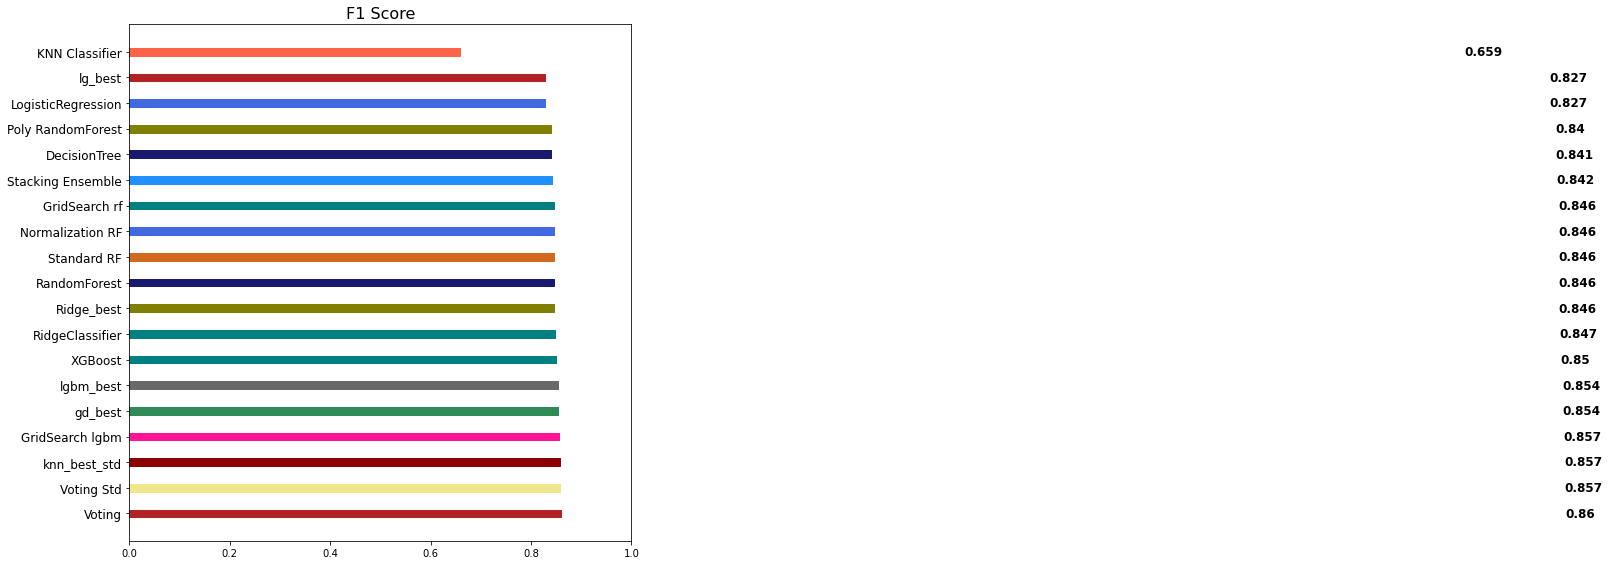

In [95]:
lgbm_best.fit(X_train, y_train)
lgbm_best_pred = lgbm_best.predict(X_test)
f1_eval('lgbm_best', lgbm_best_pred, y_test)

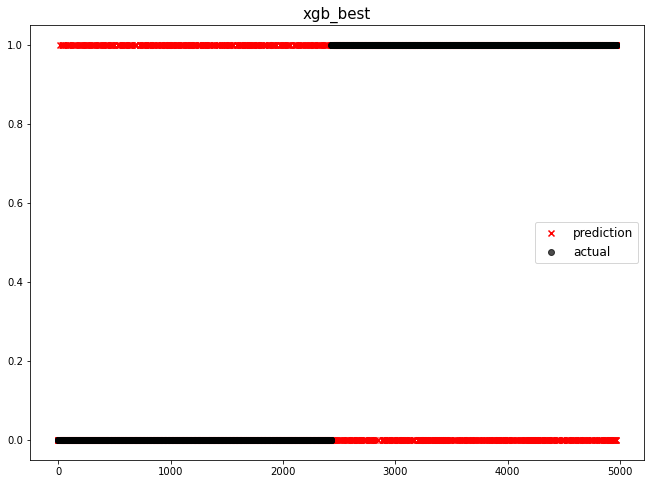

                 model        f1
0               Voting  0.859873
1           Voting Std  0.857371
2         knn_best_std  0.857371
3      GridSearch lgbm  0.856572
4             xgb_best  0.855602
5              gd_best  0.854423
6            lgbm_best  0.853951
7              XGBoost  0.849600
8      RidgeClassifier  0.847073
9           Ridge_best  0.846360
10        RandomForest  0.846229
11         Standard RF  0.846229
12    Normalization RF  0.846229
13       GridSearch rf  0.845953
14   Stacking Ensemble  0.842354
15        DecisionTree  0.840784
16   Poly RandomForest  0.839937
17  LogisticRegression  0.826988
18             lg_best  0.826988
19      KNN Classifier  0.658735


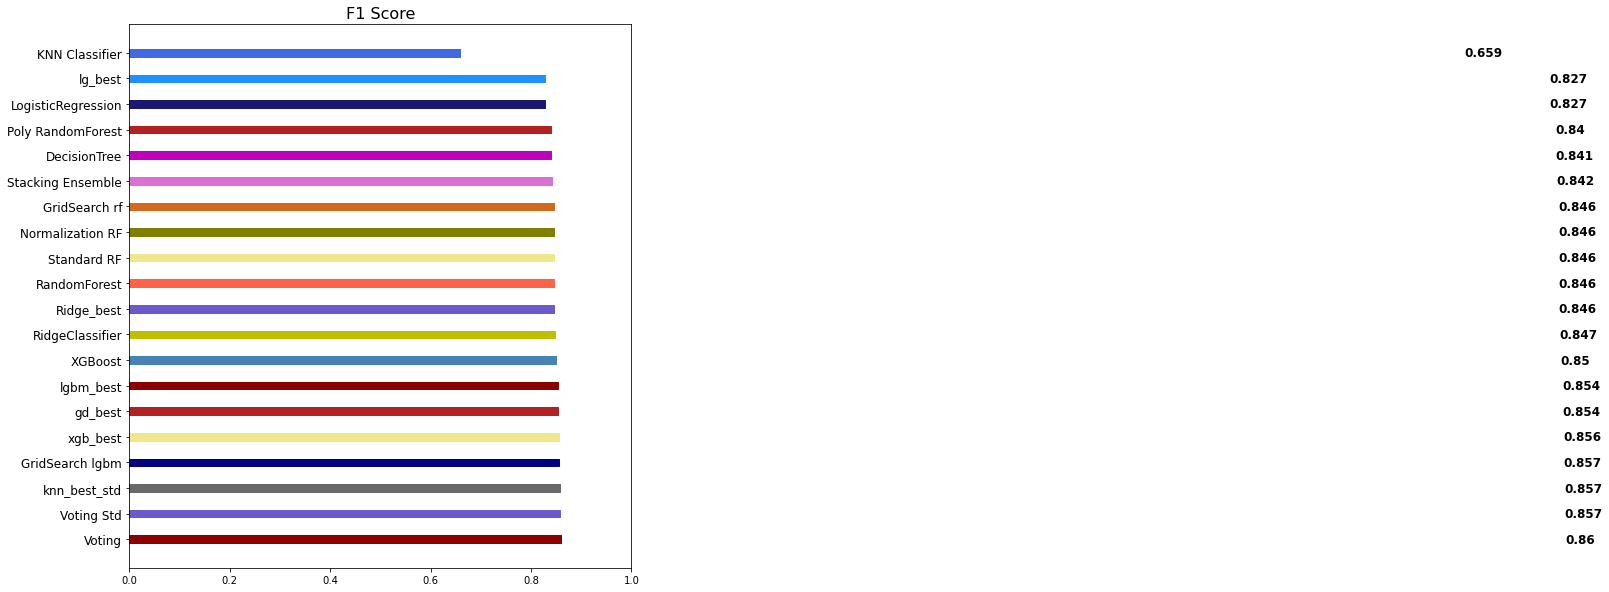

In [96]:
xgb_best.fit(X_train, y_train)
xgb_best_pred = xgb_best.predict(X_test)
f1_eval('xgb_best', xgb_best_pred, y_test)

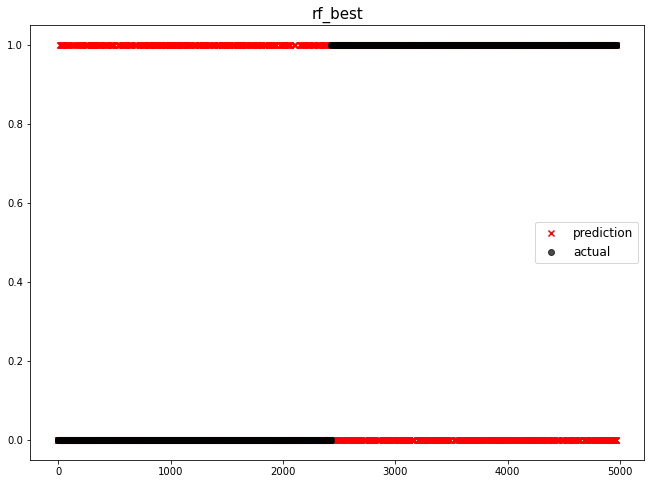

                 model        f1
0               Voting  0.859873
1           Voting Std  0.857371
2         knn_best_std  0.857371
3      GridSearch lgbm  0.856572
4             xgb_best  0.855602
5              gd_best  0.854423
6            lgbm_best  0.853951
7              XGBoost  0.849600
8      RidgeClassifier  0.847073
9           Ridge_best  0.846360
10        RandomForest  0.846229
11         Standard RF  0.846229
12    Normalization RF  0.846229
13       GridSearch rf  0.845953
14             rf_best  0.845953
15   Stacking Ensemble  0.842354
16        DecisionTree  0.840784
17   Poly RandomForest  0.839937
18  LogisticRegression  0.826988
19             lg_best  0.826988
20      KNN Classifier  0.658735


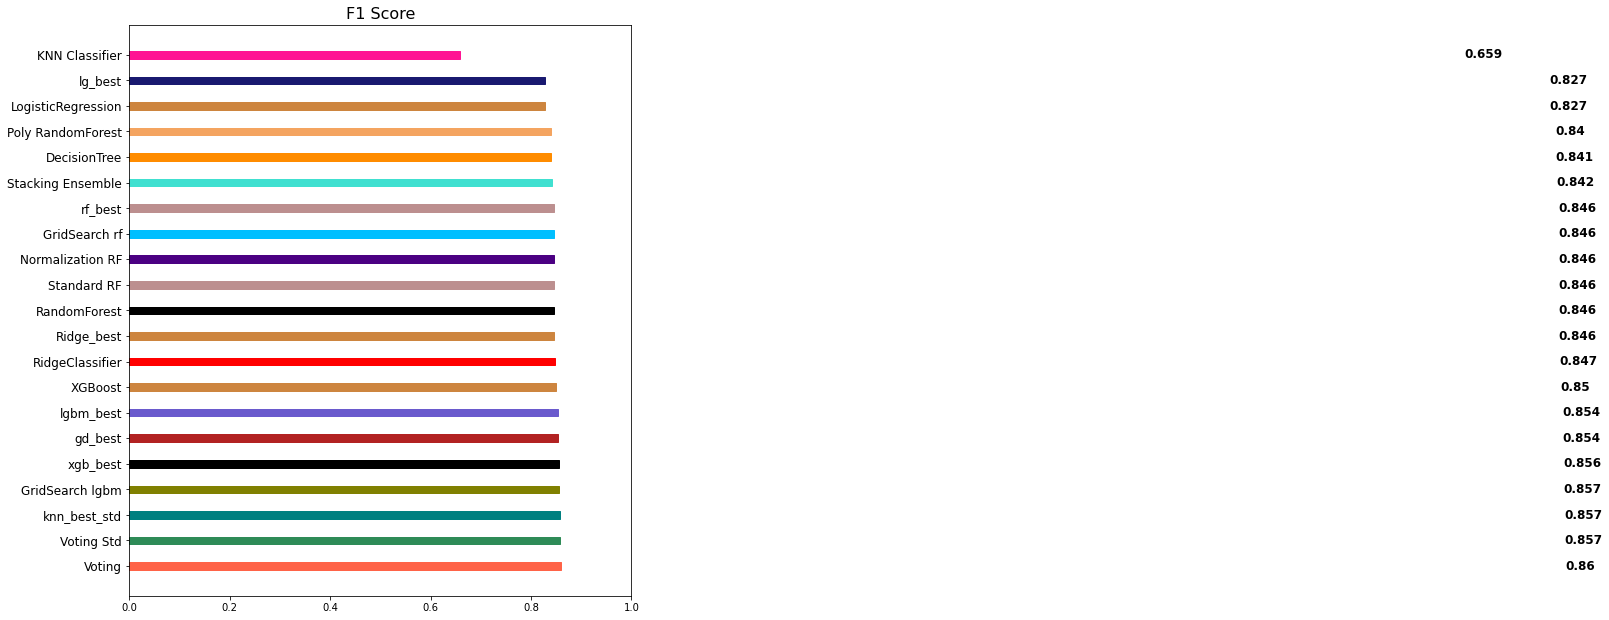

In [97]:
rf_best.fit(X_train, y_train)
rf_best_pred = rf_best.predict(X_test)
f1_eval('rf_best', rf_best_pred, y_test)

In [98]:
models = [
    # ('Logi', lg_best), 
    # ('ridge', Ridge_best),
    ('knn', knn_best),
    # ('rf', rf_best),
    ('lgbm', lgbm_best),
    ('xgb', xgb_best),
    ('gradient', gd_best)
]

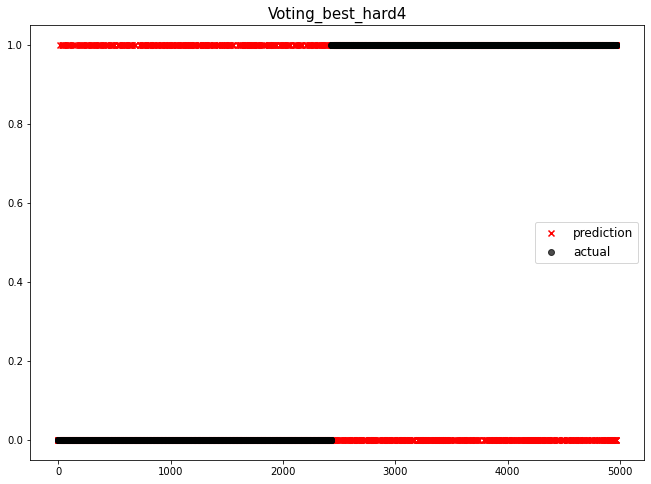

                 model        f1
0               Voting  0.859873
1           Voting Std  0.857371
2         knn_best_std  0.857371
3      GridSearch lgbm  0.856572
4             xgb_best  0.855602
5              gd_best  0.854423
6            lgbm_best  0.853951
7    Voting_best_hard4  0.852763
8              XGBoost  0.849600
9      RidgeClassifier  0.847073
10          Ridge_best  0.846360
11        RandomForest  0.846229
12         Standard RF  0.846229
13    Normalization RF  0.846229
14       GridSearch rf  0.845953
15             rf_best  0.845953
16   Stacking Ensemble  0.842354
17        DecisionTree  0.840784
18   Poly RandomForest  0.839937
19  LogisticRegression  0.826988
20             lg_best  0.826988
21      KNN Classifier  0.658735


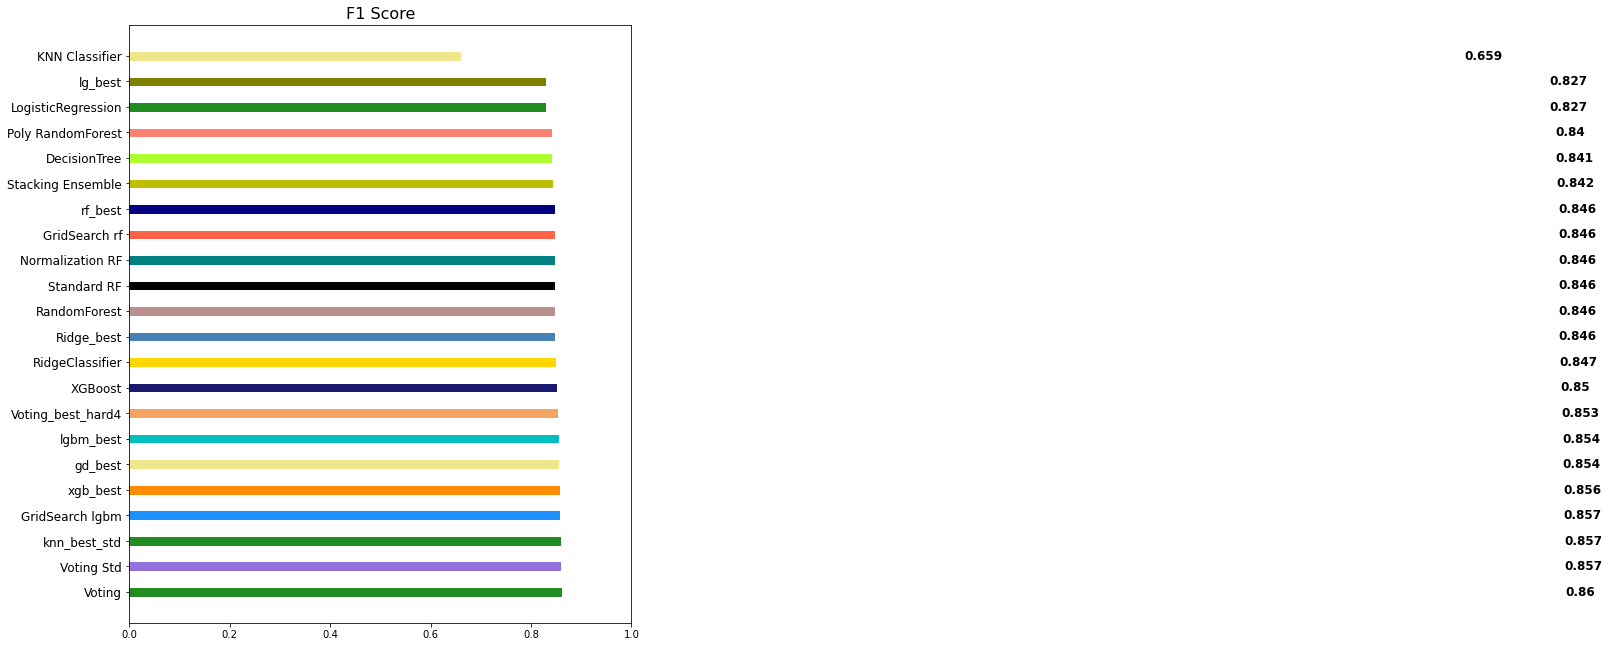

In [99]:
vc = VotingClassifier(models, voting='hard', n_jobs=-1)
vc.fit(X_train, y_train)
pred = vc.predict(X_test)
f1_eval('Voting_best_hard4', pred, y_test)

### **Stacking 결과**

In [101]:
from sklearn.ensemble import StackingClassifier

stack_models = [
    ('lgbm_std', lgbm_best), 
    ('knn_std', knn_best),
    # ('rf_bset', rf_best),
    ('Ridge', Ridge_best)
]

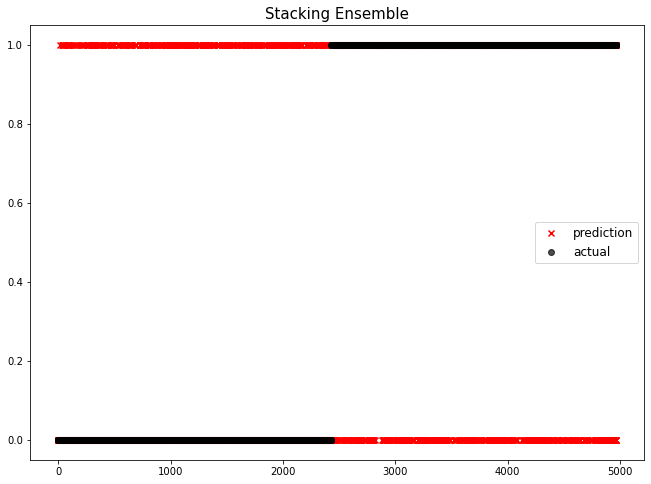

                 model        f1
0               Voting  0.859873
1           Voting Std  0.857371
2         knn_best_std  0.857371
3    Stacking Ensemble  0.857200
4      GridSearch lgbm  0.856572
5             xgb_best  0.855602
6              gd_best  0.854423
7            lgbm_best  0.853951
8    Voting_best_hard4  0.852763
9              XGBoost  0.849600
10     RidgeClassifier  0.847073
11          Ridge_best  0.846360
12        RandomForest  0.846229
13         Standard RF  0.846229
14    Normalization RF  0.846229
15       GridSearch rf  0.845953
16             rf_best  0.845953
17        DecisionTree  0.840784
18   Poly RandomForest  0.839937
19  LogisticRegression  0.826988
20             lg_best  0.826988
21      KNN Classifier  0.658735


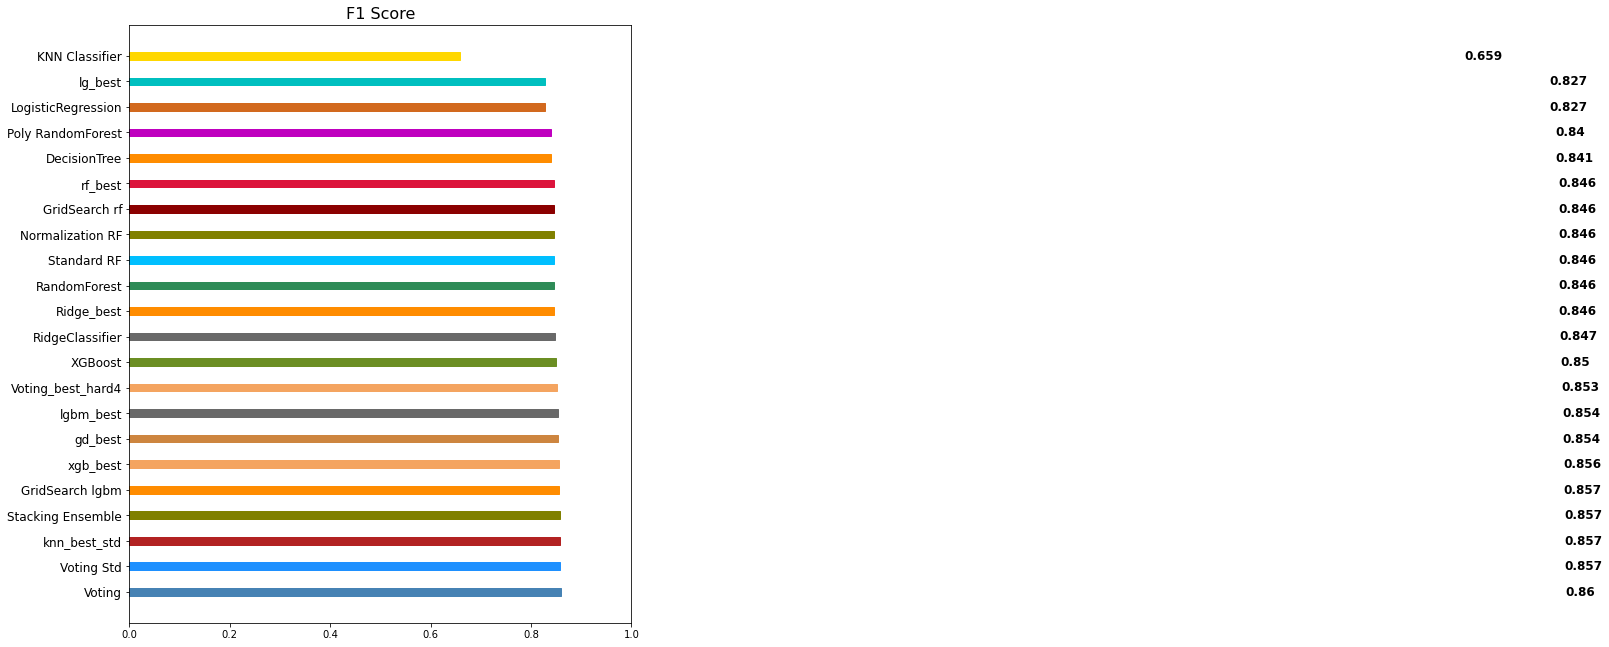

In [102]:
stack_cls = StackingClassifier(stack_models, final_estimator=xgb_best, n_jobs=-1)

# 알고리즘 3개만 사용
stack_cls.fit(X_train, y_train)
stack_pred = stack_cls.predict(X_test)
f1_eval('Stacking Ensemble', stack_pred, y_test)

In [103]:
final_outputs = {
    'xgb_best': xgb_best_pred, 
    'lgbm_std': lgbm_best_pred, 
    'knn_std': knn_best_pred,
    'rf_best': rf_best_pred, 
    'Ridge': Ridge_best_pred,
    'gdb': gd_best_pred,
}

In [104]:
final_prediction=\
final_outputs['Ridge'] * 0.1\
+final_outputs['knn_std'] * 0.2\
+final_outputs['lgbm_std'] * 0.2\
+final_outputs['xgb_best'] * 0.25\
+final_outputs['rf_best'] * 0.15\
+final_outputs['gdb'] * 0.1

In [105]:
# Confusion Matrix로 보여주기
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from IPython.display import Image

my_predictions = {}
my_pred = None
my_actual = None
my_name = None

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(11, 8))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    
plt.show
()

def plot_confusionmatrix(name_, actual,pred):
    cm = confusion_matrix(actual, pred)
    cm = pd.DataFrame(cm, columns=['Lose','Win'], index=['Lose','Win'])# columns=['Lose','Win'], index=['Lose','Win']
    plt.figure(figsize=(11,8))
    sns.heatmap(cm, annot=True, annot_kws={'size':20}, cmap='YlOrBr')
    plt.xlabel('Predict', fontsize=20)
    plt.ylabel('Actual', fontsize=20)
    
    plt.show()
    print(cm)

def f1_eval(name_, pred, actual):

    global my_predictions, colors, my_pred, my_actual, my_name
    
    my_name = name_
    my_pred = pred
    my_actual = actual
    plot_confusionmatrix(name_, pred, actual)
#    plot_predictions(name_, pred, actual)

    f1 = f1_score(actual, pred)
    my_predictions[name_] = f1

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'f1'])
    print(df)
    min_ = 0
    max_ = 1
    
    length = len(df) / 2



    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['f1'], height=0.3)
    
    for i, v in enumerate(df['f1']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('F1 Score', fontsize=16)
    plt.xlim(min_, max_)
    
    
plt.show
()
    
def add_model(name_, pred, actual):
    global my_predictions, my_pred, my_actual, my_name
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    f1 = f1_score(actual, pred)
    my_predictions[name_] = f1

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

def plot_all():
    global my_predictions, my_pred, my_actual, my_name
    
    plot_predictions(my_name, my_pred, my_actual)
    
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'f1'])
    print(df)
    min_ = 0
    max_ = 1
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['f1'], height=0.3)
    
    for i, v in enumerate(df['f1']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('F1 Score', fontsize=16)
    plt.xlim(min_, max_)
    
    
plt.show
() 

()

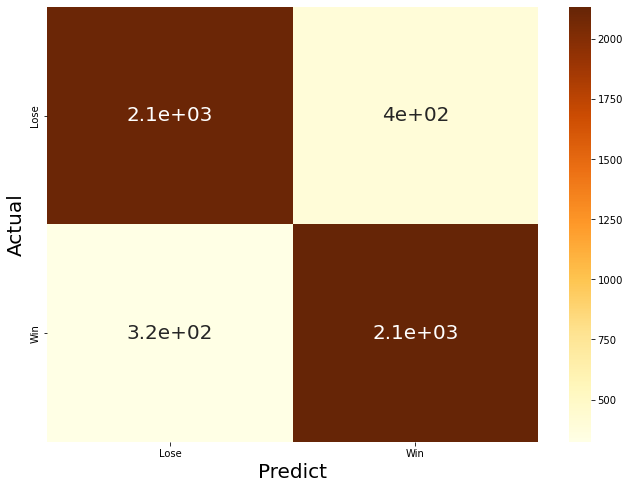

      Lose   Win
Lose  2107   400
Win    324  2134
               model        f1
0  Weighted Blending  0.854968


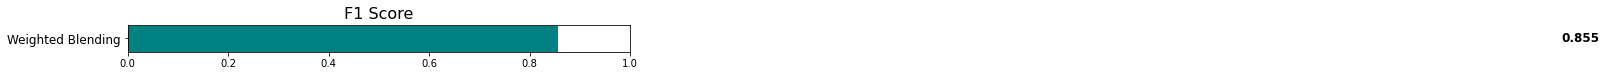

In [106]:
# Weighted Blending score
f1_eval('Weighted Blending', (final_prediction>0.5)+0, y_test)

In [20]:
import shap
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


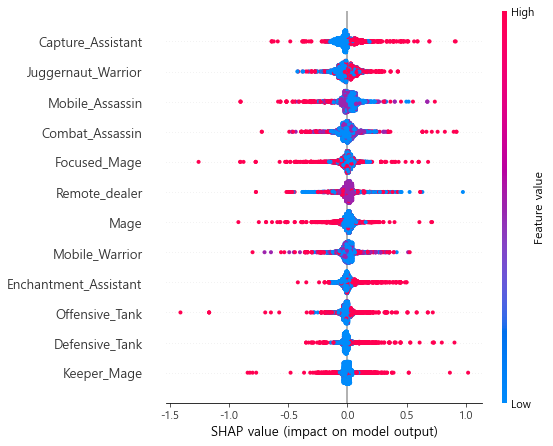

In [28]:
shap.initjs()
explainer = shap.TreeExplainer(xgb)
#explainer = shap.TreeExplainer(knn_best)
shap_values = explainer.shap_values(X_test)
fig = shap.summary_plot(shap_values, X_test)
#plt.savefig(f'{data}/shap.png', dpi=300, bbox_inches="tight")